# Boston Marathon Data Analysis

## CSV 파일 불러오기

In [7]:
import pandas as pd
marathon_2015 = pd.read_csv('../marathon_source_data/boston_data/marathon_results_2015.csv')
marathon_2016 = pd.read_csv('../marathon_source_data/boston_data/marathon_results_2016.csv')
marathon_2017 = pd.read_csv('../marathon_source_data/boston_data/marathon_results_2017.csv')

In [16]:
marathon_2015.head(2)

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,2:09:48,2,2,2


## Column 삭제

In [14]:
marathon_2015.drop(['Unnamed: 0','Unnamed: 9','Proj Time'], axis=1, inplace=True)
marathon_2016.drop(['Bib','Unnamed: 8','Proj Time'], axis=1, inplace=True)
marathon_2017.drop(['Unnamed: 0','Unnamed: 9','Proj Time'], axis=1, inplace=True)

In [15]:
marathon_2017.head(2)

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,0:15:25,0:30:28,...,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,2:09:37,1,1,1
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,0:15:24,0:30:27,...,1:04:35,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,2:09:58,2,2,2


In [19]:
marathon_2015.info()
# 시간데이터들이 object형으로 정의되어있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 23 columns):
Bib              26598 non-null object
Name             26598 non-null object
Age              26598 non-null int64
M/F              26598 non-null object
City             26598 non-null object
State            24047 non-null object
Country          26598 non-null object
Citizen          1064 non-null object
5K               26598 non-null object
10K              26598 non-null object
15K              26598 non-null object
20K              26598 non-null object
Half             26598 non-null object
25K              26598 non-null object
30K              26598 non-null object
35K              26598 non-null object
40K              26598 non-null object
Pace             26598 non-null object
Official Time    26598 non-null object
Overall          26598 non-null int64
Gender           26598 non-null int64
Division         26598 non-null int64
Year             26598 non-null object

In [25]:
marathon_2015['Year'] = '2015'
marathon_2016['Year'] = '2016'
marathon_2017['Year'] = '2017'
marathon_2015['Senior'] = marathon_2015['Age']>=60
marathon_2016['Senior'] = marathon_2016['Age']>=60
marathon_2017['Senior'] = marathon_2017['Age']>=60

## object 타입을 시간데이터로 변환 ( pd.to_timedelta 이용)

In [32]:
marathon_2015['Official Time_Time_Type'] = pd.to_timedelta(marathon_2015['Official Time'])
marathon_2016['Official Time_Time_Type'] = pd.to_timedelta(marathon_2016['Official Time'])
marathon_2017['Official Time_Time_Type'] = pd.to_timedelta(marathon_2017['Official Time'])
marathon_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 25 columns):
Bib                        26598 non-null object
Name                       26598 non-null object
Age                        26598 non-null int64
M/F                        26598 non-null object
City                       26598 non-null object
State                      24047 non-null object
Country                    26598 non-null object
Citizen                    1064 non-null object
5K                         26598 non-null object
10K                        26598 non-null object
15K                        26598 non-null object
20K                        26598 non-null object
Half                       26598 non-null object
25K                        26598 non-null object
30K                        26598 non-null object
35K                        26598 non-null object
40K                        26598 non-null object
Pace                       26598 non-null object
Official Ti

## 초단위로 변환 1 - 함수 정의

In [39]:
def changeSec(record):
    hms = record.str.split(':', n=2, expand = True)
    return hms[0].astype(int)*3600 + hms[1].astype(int)*60 + hms[2].astype(int)

In [48]:
marathon_2015['Official Time_Sec'] = changeSec(marathon_2015['Official Time'])
marathon_2016['Official Time_Sec'] = changeSec(marathon_2016['Official Time'])
marathon_2017['Official Time_Sec'] = changeSec(marathon_2017['Official Time'])

In [42]:
marathon_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 26 columns):
Bib                        26598 non-null object
Name                       26598 non-null object
Age                        26598 non-null int64
M/F                        26598 non-null object
City                       26598 non-null object
State                      24047 non-null object
Country                    26598 non-null object
Citizen                    1064 non-null object
5K                         26598 non-null object
10K                        26598 non-null object
15K                        26598 non-null object
20K                        26598 non-null object
Half                       26598 non-null object
25K                        26598 non-null object
30K                        26598 non-null object
35K                        26598 non-null object
40K                        26598 non-null object
Pace                       26598 non-null object
Official Ti

## 초단위로 변환 2 - astype 사용

In [49]:
import numpy as np
marathon_2015['Official Time_Type_toSec'] = marathon_2015['Official Time_Time_Type'].astype('m8[s]').astype(np.int64)
marathon_2016['Official Time_Type_toSec'] = marathon_2016['Official Time_Time_Type'].astype('m8[s]').astype(np.int64)
marathon_2017['Official Time_Type_toSec'] = marathon_2017['Official Time_Time_Type'].astype('m8[s]').astype(np.int64)

In [59]:
marathon_2015.head(2)

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,Pace,Official Time,Overall,Gender,Division,Year,Senior,Official Time_Time_Type,Official Time_Sec,Official Time_Type_toSec
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,0:04:56,2:09:17,1,1,1,2015,False,02:09:17,7757,7757
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,0:04:58,2:09:48,2,2,2,2015,False,02:09:48,7788,7788


## 데이터 병합 (marathon_2015 ~ 2017)

In [53]:
marathon_2015_2017 = pd.concat([marathon_2015,marathon_2016,marathon_2017], ignore_index = True, sort = True).set_index('Official Time_Time_Type')

In [58]:
marathon_2015_2017.head(5)

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,M/F,Name,Official Time,Official Time_Sec,Official Time_Type_toSec,Overall,Pace,Senior,State,Year
Official Time_Time_Type,,,,,,,,,,,,,,,,,,,,,
02:09:17,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:02:39,0:14:43,25,3,...,M,"Desisa, Lelisa",2:09:17,7757,7757,1,0:04:56,False,NaN,2015
02:09:48,0:29:43,0:44:58,1:00:28,1:16:07,1:31:59,1:47:59,2:02:42,0:14:43,30,4,...,M,"Tsegay, Yemane Adhane",2:09:48,7788,7788,2,0:04:58,False,NaN,2015
02:10:22,0:29:43,0:44:57,1:00:29,1:16:07,1:32:00,1:47:59,2:03:01,0:14:43,29,8,...,M,"Chebet, Wilson",2:10:22,7822,7822,3,0:04:59,False,NaN,2015
02:10:47,0:29:44,0:45:01,1:00:29,1:16:07,1:32:00,1:48:03,2:03:47,0:14:43,28,11,...,M,"Kipyego, Bernard",2:10:47,7847,7847,4,0:05:00,False,NaN,2015
02:10:49,0:29:44,0:44:58,1:00:28,1:16:07,1:32:00,1:47:59,2:03:27,0:14:43,32,10,...,M,"Korir, Wesley",2:10:49,7849,7849,5,0:05:00,False,NaN,2015


## 간단한 통계 정보 조회

In [56]:
print(marathon_2015_2017.describe())

                Age      Division        Gender  Official Time_Sec  \
count  79638.000000  79638.000000  79638.000000       79638.000000   
mean      42.415166   1618.782792   6693.365064       13989.929167   
std       11.355453   1448.369424   3927.594786        2492.272069   
min       18.000000      1.000000      1.000000        7757.000000   
25%       34.000000    510.000000   3319.000000       12258.000000   
50%       42.000000   1179.500000   6637.000000       13592.000000   
75%       50.000000   2219.000000   9955.000000       15325.000000   
max       84.000000   6004.000000  14581.000000       37823.000000   

       Official Time_Type_toSec       Overall  
count              79638.000000  79638.000000  
mean               13989.929167  13273.683417  
std                 2492.272069   7663.512720  
min                 7757.000000      1.000000  
25%                12258.000000   6637.250000  
50%                13592.000000  13273.500000  
75%                15325.000000  

## 원하는 조건으로 정렬 ( Age 기준 )

In [64]:
marathon_2015_2017.sort_values(by=['Age'], ascending=True)
# 원본에 적용되지 X 

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,M/F,Name,Official Time,Official Time_Sec,Official Time_Type_toSec,Overall,Pace,Senior,State,Year
Official Time_Time_Type,,,,,,,,,,,,,,,,,,,,,
04:35:48,1:05:35,1:37:09,2:09:23,2:44:04,3:19:32,3:52:53,4:22:25,0:32:48,18,25881,...,M,"Friend, Tynan",4:35:48,16548,16548,23445,0:10:32,False,MA,2015
04:01:22,1:00:41,1:28:12,1:56:29,2:24:39,2:53:27,3:22:06,3:49:29,0:32:53,18,15125,...,F,"Rucker, Alyssa",4:01:22,14482,14482,15921,0:09:13,False,NC,2017
04:13:02,0:58:09,1:26:51,1:55:34,2:24:42,2:55:49,3:27:08,3:59:25,0:30:08,18,29346,...,F,"Goodwin, Anna E.",4:13:02,15182,15182,20969,0:09:40,False,MA,2015
03:35:33,0:45:37,1:08:49,1:32:35,1:56:44,2:22:45,2:50:52,3:21:41,0:22:40,18,NaN,...,M,"Young, Nicholas A.",3:35:33,12933,12933,9392,0:08:14,False,IN,2016
04:01:25,0:55:59,1:23:29,1:52:42,2:23:01,2:52:56,3:22:20,3:49:53,0:28:54,18,30496,...,F,"Pohl, Elizabeth S.",4:01:25,14485,14485,15933,0:09:13,False,MA,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05:57:54,1:14:17,1:53:57,2:36:49,3:19:46,4:05:06,4:51:33,5:38:06,0:36:38,82,25552,...,M,"Green, Jimmy",5:57:54,21474,21474,26488,0:13:40,True,MA,2015
04:44:39,0:57:36,1:27:21,1:59:56,2:34:36,3:11:06,3:49:05,4:27:33,0:28:30,83,25134,...,M,"Yoo, Jack",4:44:39,17079,17079,22621,0:10:52,True,IL,2017
05:44:53,1:13:53,1:51:25,2:30:50,3:10:56,3:54:49,4:40:47,5:24:31,0:36:24,83,NaN,...,F,"Beiers, Katherine",5:44:53,20693,20693,26163,0:13:10,True,CA,2016


## 각 구간 별 기록을 시간데이터로 변환

In [69]:
marathon_2015_2017['5K'] = pd.to_timedelta(marathon_2015_2017['5K'])
marathon_2015_2017['10K'] = pd.to_timedelta(marathon_2015_2017['10K'])
marathon_2015_2017['15K'] = pd.to_timedelta(marathon_2015_2017['15K'])
marathon_2015_2017['20K'] = pd.to_timedelta(marathon_2015_2017['20K'])
marathon_2015_2017['Half'] = pd.to_timedelta(marathon_2015_2017['Half'])
marathon_2015_2017['25K'] = pd.to_timedelta(marathon_2015_2017['25K'])
marathon_2015_2017['30K'] = pd.to_timedelta(marathon_2015_2017['30K'])
marathon_2015_2017['35K'] = pd.to_timedelta(marathon_2015_2017['35K'])
marathon_2015_2017['40K'] = pd.to_timedelta(marathon_2015_2017['40K'])
marathon_2015_2017['Pace'] = pd.to_timedelta(marathon_2015_2017['Pace'])

marathon_2015_2017.head(2)

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,M/F,Name,Official Time,Official Time_Sec,Official Time_Type_toSec,Overall,Pace,Senior,State,Year
Official Time_Time_Type,,,,,,,,,,,,,,,,,,,,,
02:09:17,00:29:43,00:44:57,01:00:29,01:16:07,01:32:00,01:47:59,02:02:39,00:14:43,25,3,...,M,"Desisa, Lelisa",2:09:17,7757,7757,1,00:04:56,False,NaN,2015
02:09:48,00:29:43,00:44:58,01:00:28,01:16:07,01:31:59,01:47:59,02:02:42,00:14:43,30,4,...,M,"Tsegay, Yemane Adhane",2:09:48,7788,7788,2,00:04:58,False,NaN,2015


## CSV 파일로 저장

In [70]:
marathon_2015_2017.to_csv('./marathon_final.csv')

## 각 구간별 시간데이터를 초 단위로 변환

In [ ]:
marathon_2015_2017['5K'] = marathon_2015_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['10K'] = marathon_2015_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['15K'] = marathon_2015_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['20K'] = marathon_2015_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['Half'] = marathon_2015_2017['Half'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['25K'] = marathon_2015_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['30K'] = marathon_2015_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['35K'] = marathon_2015_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['40K'] = marathon_2015_2017['40K'].astype('m8[s]').astype(np.int64)
marathon_2015_2017['Pace'] = marathon_2015_2017['Pace'].astype('m8[s]').astype(np.int64)

# Visualizaion
1. Bar Chart
2. Pareto Chart
3. Pie Chart
4. Line Chart
5. Scatter Chart
6. Bubble Chart
7. Heat Map
8. Histogram
9. Box Plot
10. Geo Chart

## 1. Bar Chart
#### State 별 사람 표시

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
usa_runner = marathon_2015_2017[marathon_2015_2017.Country == 'USA']

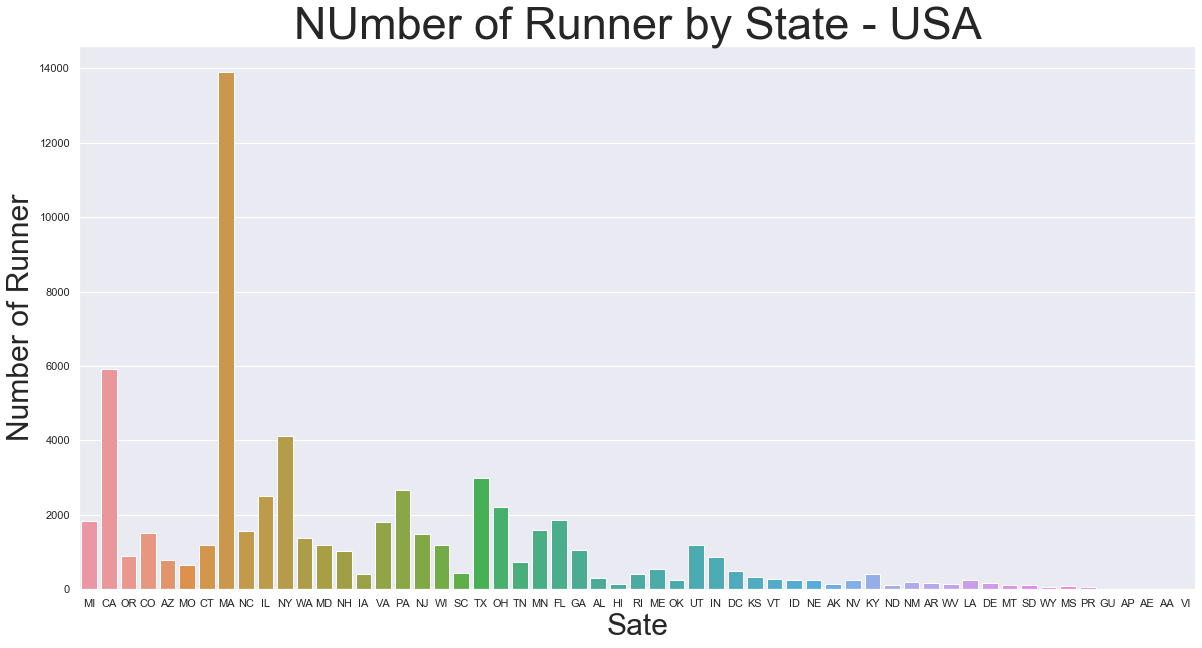

In [320]:
plt.figure(figsize = (20,10))
runner_state = sns.countplot('State', data = usa_runner)
runner_state.set_title('NUmber of Runner by State - USA', fontsize = 45)
runner_state.set_xlabel('Sate', fontdict={'size':30})
runner_state.set_ylabel('Number of Runner', fontdict={'size':30})
plt.show()

In [154]:
marathon_2015_2017.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 79638 entries, 02:09:17 to 07:58:14
Data columns (total 26 columns):
10K                         79638 non-null int64
15K                         79638 non-null int64
20K                         79638 non-null int64
25K                         79638 non-null int64
30K                         79638 non-null int64
35K                         79638 non-null int64
40K                         79638 non-null int64
5K                          79638 non-null int64
Age                         79638 non-null int64
Bib                         53008 non-null object
Citizen                     3440 non-null object
City                        79637 non-null object
Country                     79638 non-null object
Division                    79638 non-null int64
Gender                      79638 non-null int64
Half                        79638 non-null int64
M/F                         79638 non-null object
Name                        79638 non-nu

#### 남 / 녀 구별하여 표시

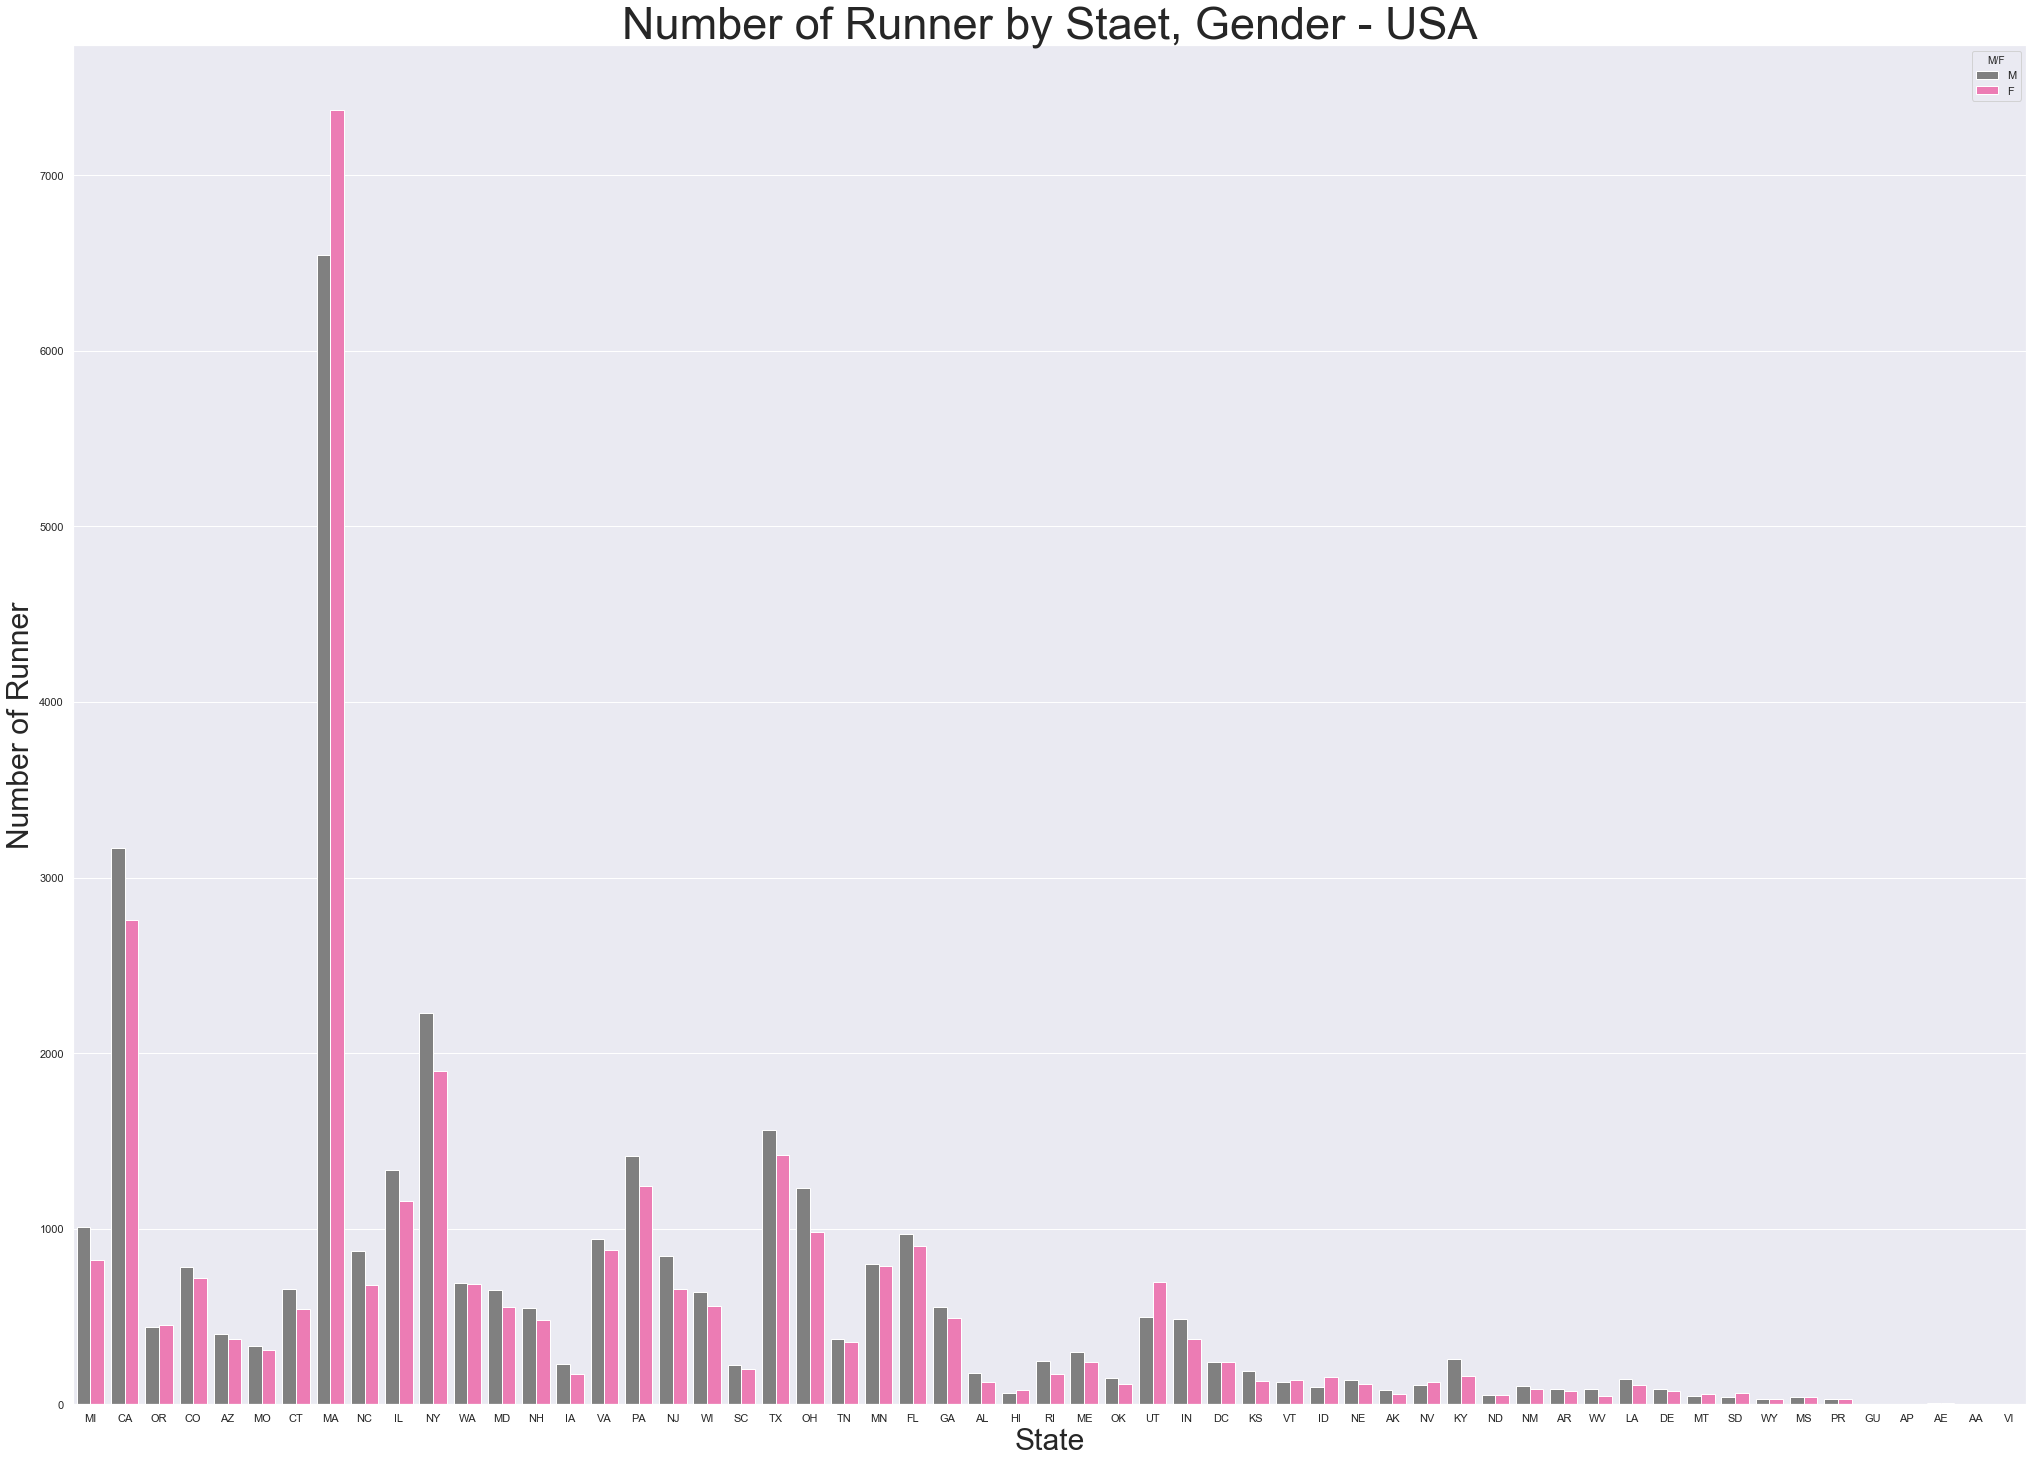

In [319]:
plt.figure(figsize=(35,25))
runner_state = sns.countplot('State', data = usa_runner, hue = 'M/F', palette={'M':'Grey','F':'HotPink'})
runner_state.set_title('Number of Runner by Staet, Gender - USA', fontsize = 45)
runner_state.set_xlabel('State', fontdict={'size':30})
runner_state.set_ylabel('Number of Runner', fontdict={'size':30})
plt.show()

#### 매 년 각 주별 참가자 확인

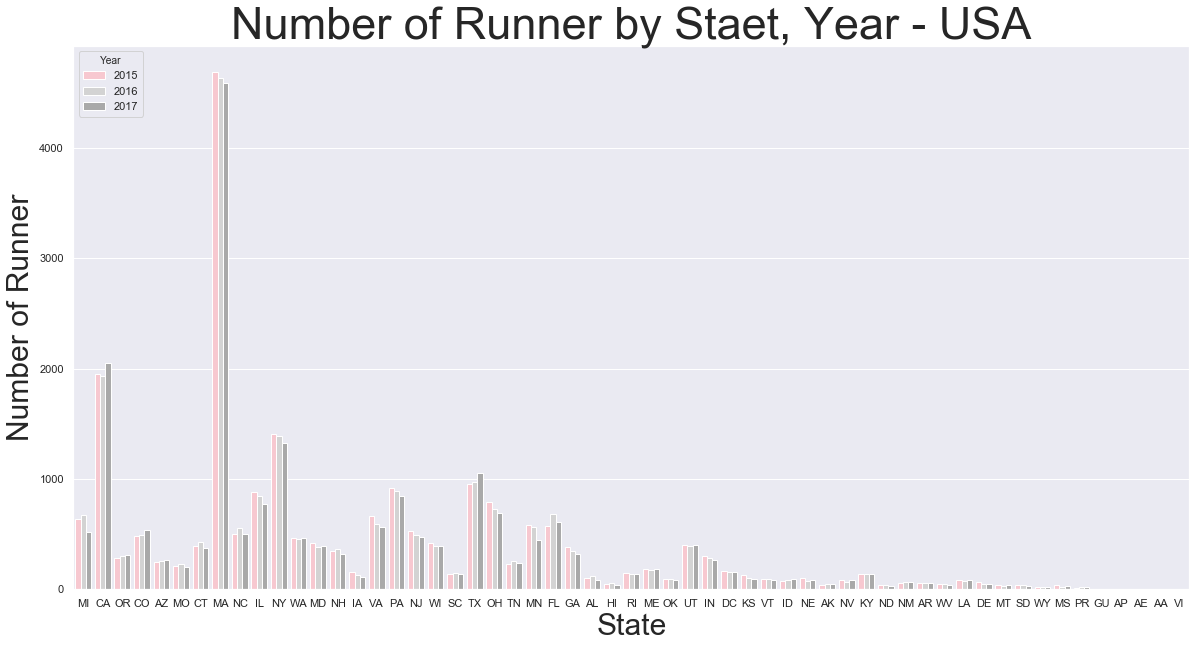

In [318]:
plt.figure(figsize=(20,10))
runner_state = sns.countplot('State', data = usa_runner, hue = 'Year', palette={'2015':'Pink', '2016':'lightGrey', '2017':'DarkGrey'
})
runner_state.set_title('Number of Runner by Staet, Year - USA', fontsize = 45)
runner_state.set_xlabel('State', fontdict={'size':30})
runner_state.set_ylabel('Number of Runner', fontdict={'size':30})
plt.show()

## 2. Pareto Chart

In [105]:
runner_18_60 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18,61))]
runner_18_60_count = runner_18_60.Age.value_counts()
runner_18_60.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 74945 entries, 02:09:17 to 07:58:14
Data columns (total 26 columns):
10K                         74945 non-null int64
15K                         74945 non-null int64
20K                         74945 non-null int64
25K                         74945 non-null int64
30K                         74945 non-null int64
35K                         74945 non-null int64
40K                         74945 non-null int64
5K                          74945 non-null int64
Age                         74945 non-null int64
Bib                         49926 non-null object
Citizen                     3318 non-null object
City                        74944 non-null object
Country                     74945 non-null object
Division                    74945 non-null int64
Gender                      74945 non-null int64
Half                        74945 non-null int64
M/F                         74945 non-null object
Name                        74945 non-nu

In [158]:
runner_18_60_count.head()

45    3236
46    3039
40    2734
47    2566
50    2498
Name: Age, dtype: int64

In [108]:
x =  runner_18_60_count.index
x = [str(i) for i in x]

y = runner_18_60_count.values
# 각각의 비율
ratio = y / y.sum()
# 누적된 퍼센트를 나타내기위해 정의
ratio_sum = ratio.cumsum()

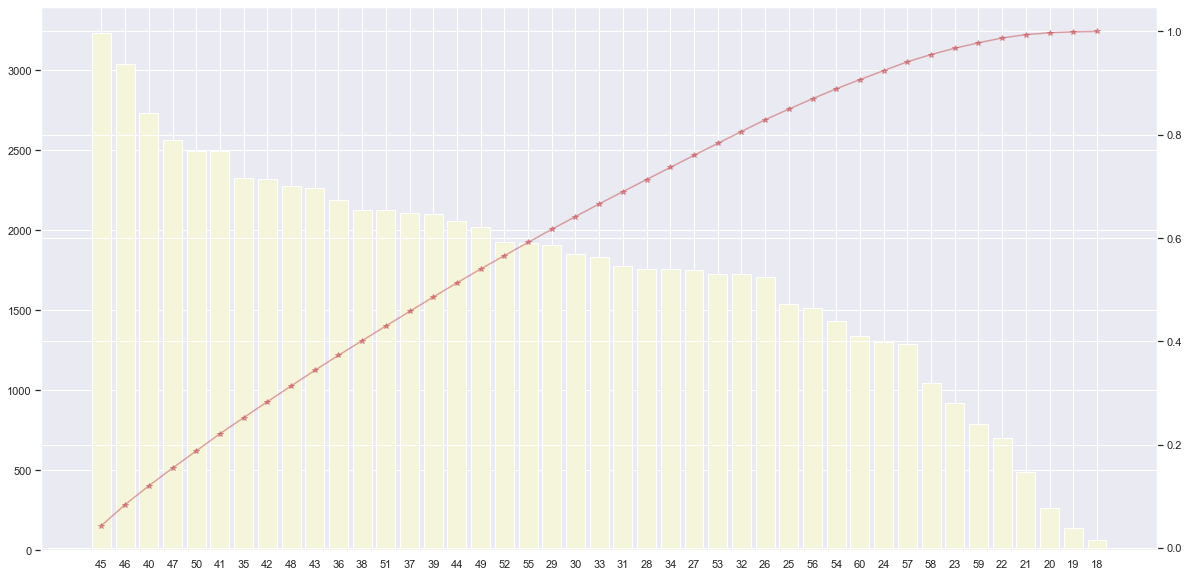

In [316]:
fig, barChart = plt.subplots(figsize=(20,10))
# Bar Chart 생성
barChart.bar(x, y, color = 'beige')
# twinx --> x축을 공유해주는 함수 사용
lineChart = barChart.twinx()
# '-ro' : 색은 빨간색과 점을 사용,투명도 정도 : alpha 
lineChart.plot(x, ratio_sum, '-r*', alpha=0.5)

## 3. Pie Chart

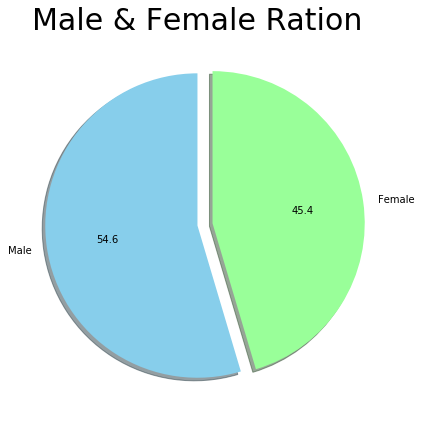

In [199]:
labels = 'Male','Female'
explode = (0,0.1)         # 그래프를 입체적으로 보여주기
plt.figure(figsize=(7,7))
plt.pie(marathon_2015_2017['M/F'].value_counts(), explode=explode, labels=labels, startangle=90, shadow=True, autopct='%.1f', colors=('skyblue','#99ff99'))
plt.title('Male & Female Ration', fontsize = 30)
plt.show()

## 4. Line Chart

### Boston Marathon Map

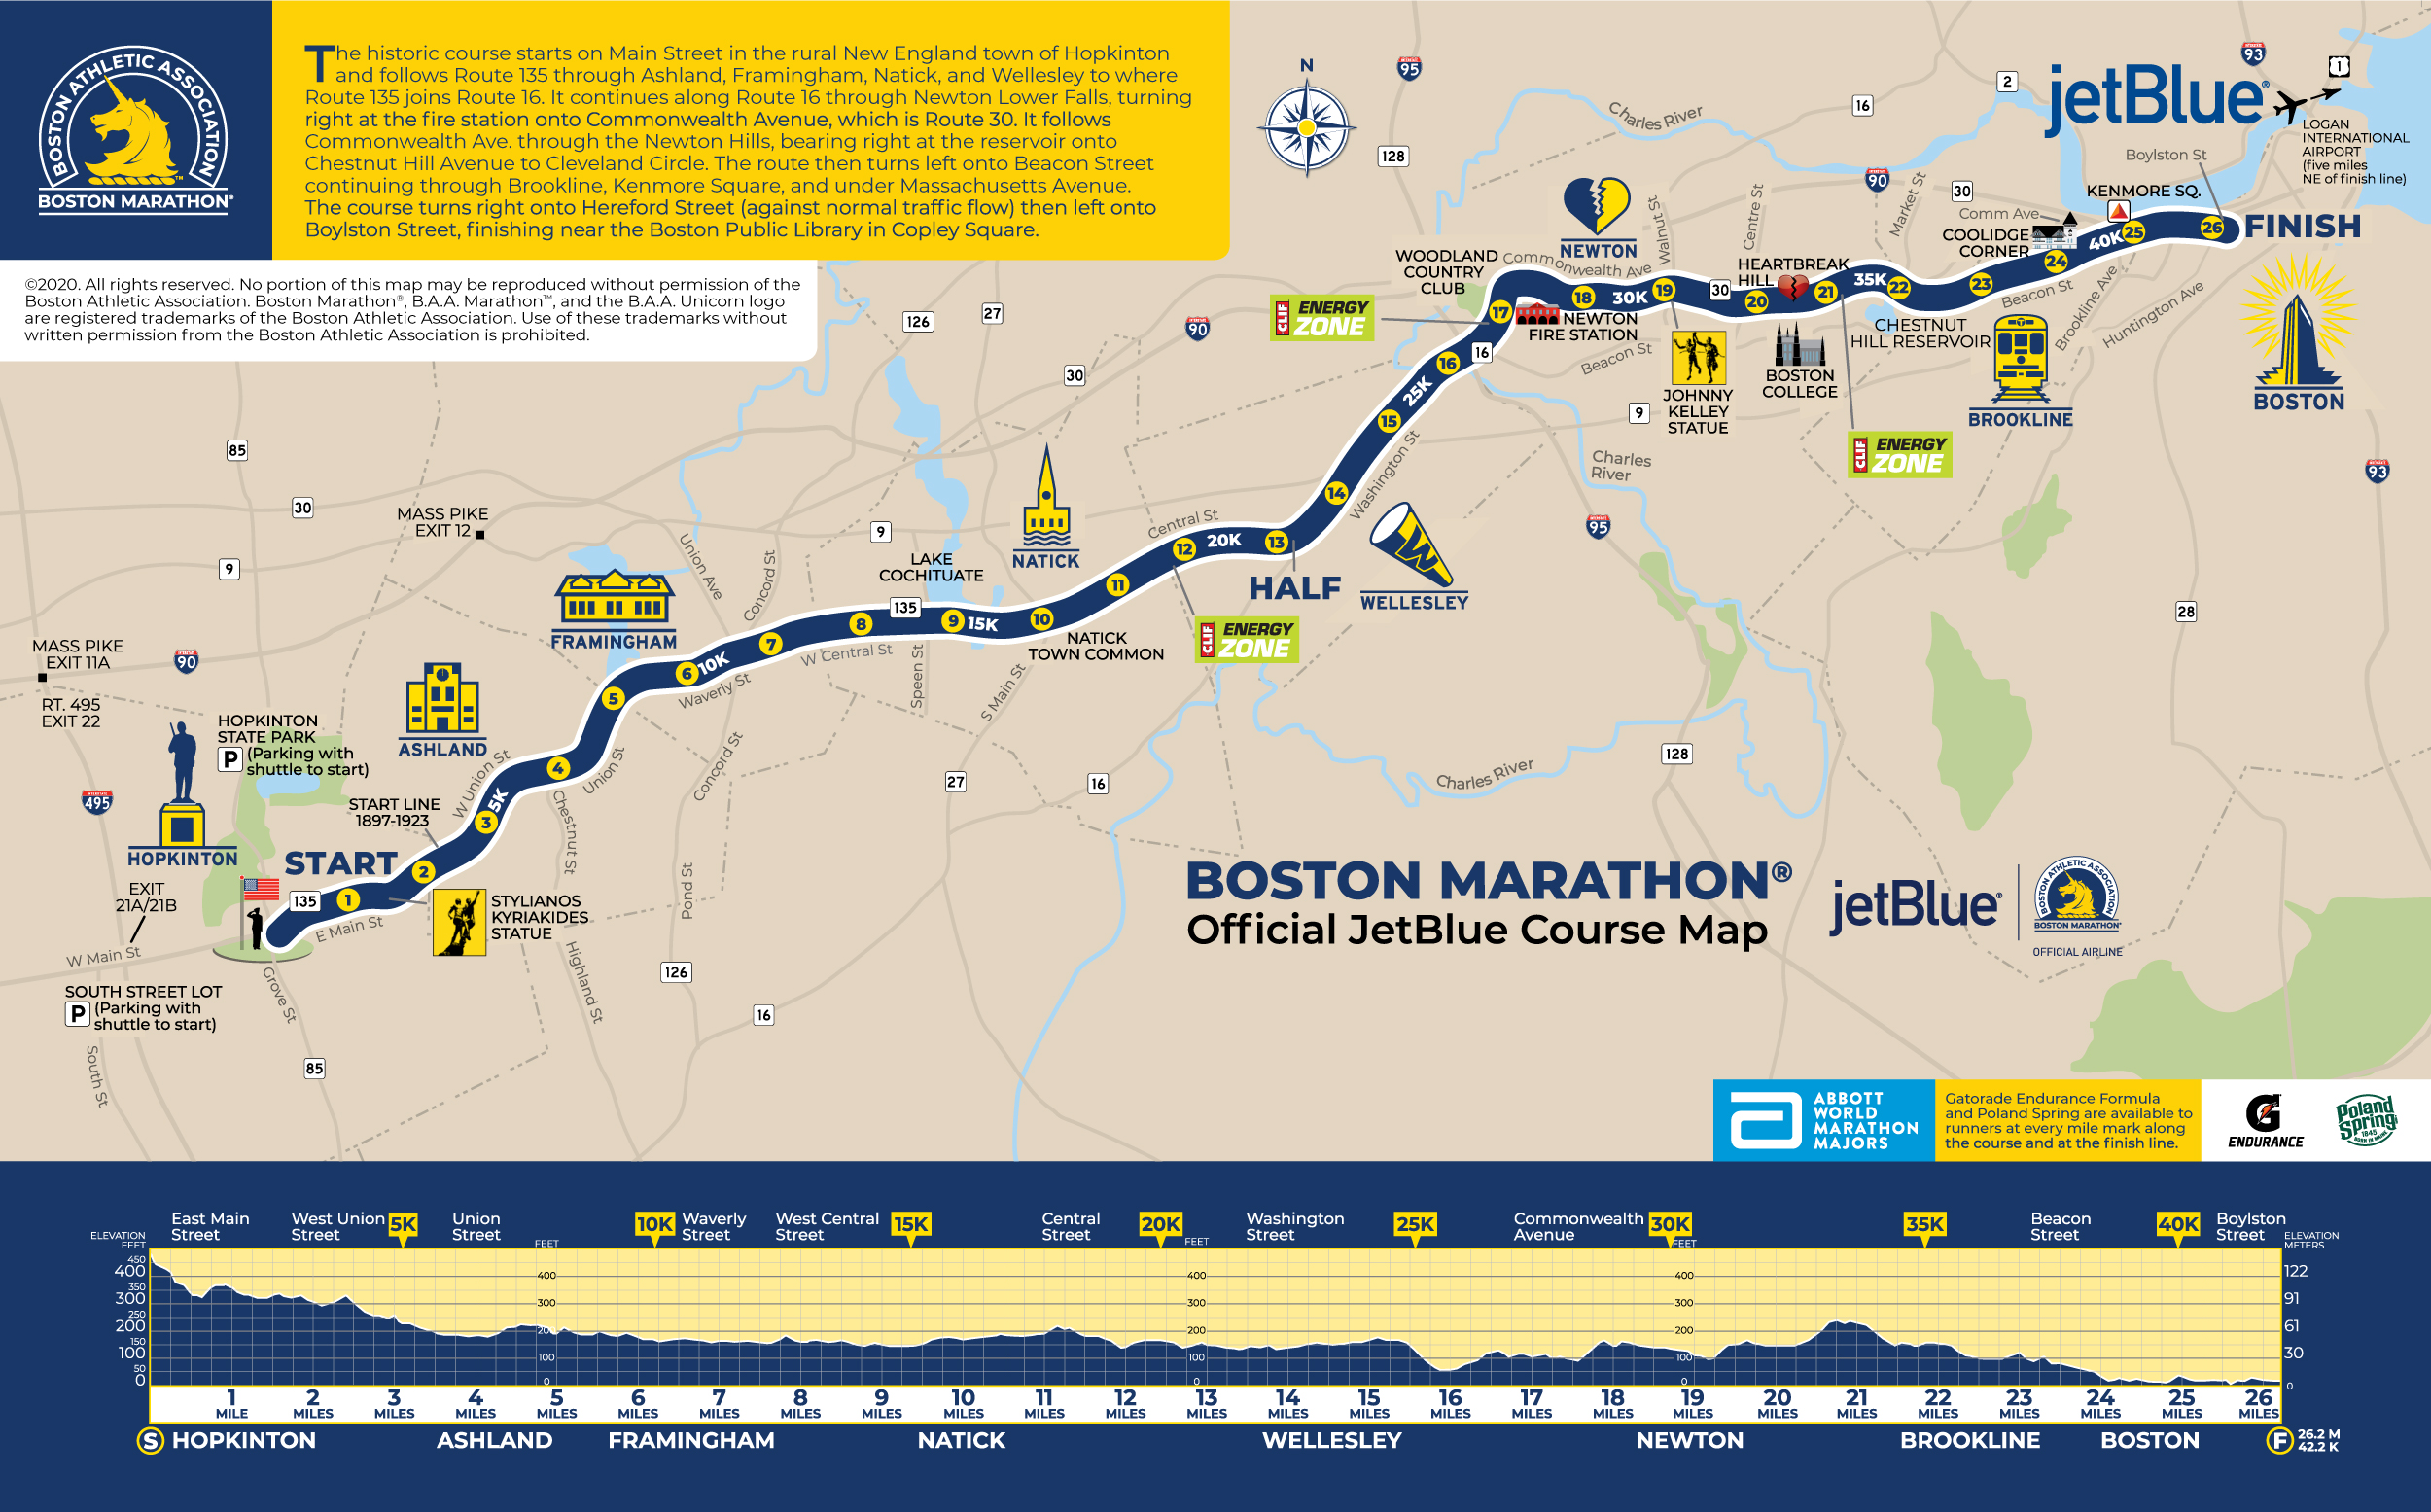

In [208]:
from IPython.display import Image
Image('./boston_map.jpg')

In [211]:
marathon_2015_2017.head()

,10K,15K,20K,25K,30K,35K,40K,5K,Age,Bib,...,M/F,Name,Official Time,Official Time_Sec,Official Time_Type_toSec,Overall,Pace,Senior,State,Year
Official Time_Time_Type,,,,,,,,,,,,,,,,,,,,,
02:09:17,1783,2697,3629,4567,5520,6479,7359,883,25,3,...,M,"Desisa, Lelisa",2:09:17,7757,7757,1,296,False,NaN,2015
02:09:48,1783,2698,3628,4567,5519,6479,7362,883,30,4,...,M,"Tsegay, Yemane Adhane",2:09:48,7788,7788,2,298,False,NaN,2015
02:10:22,1783,2697,3629,4567,5520,6479,7381,883,29,8,...,M,"Chebet, Wilson",2:10:22,7822,7822,3,299,False,NaN,2015
02:10:47,1784,2701,3629,4567,5520,6483,7427,883,28,11,...,M,"Kipyego, Bernard",2:10:47,7847,7847,4,300,False,NaN,2015
02:10:49,1784,2698,3628,4567,5520,6479,7407,883,32,10,...,M,"Korir, Wesley",2:10:49,7849,7849,5,300,False,NaN,2015


In [216]:
marathon_2015_2017['Official Time'] = pd.to_timedelta(marathon_2015_2017['Official Time'])
marathon_2015_2017.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 79638 entries, 02:09:17 to 07:58:14
Data columns (total 26 columns):
10K                         79638 non-null int64
15K                         79638 non-null int64
20K                         79638 non-null int64
25K                         79638 non-null int64
30K                         79638 non-null int64
35K                         79638 non-null int64
40K                         79638 non-null int64
5K                          79638 non-null int64
Age                         79638 non-null int64
Bib                         53008 non-null object
Citizen                     3440 non-null object
City                        79637 non-null object
Country                     79638 non-null object
Division                    79638 non-null int64
Gender                      79638 non-null int64
Half                        79638 non-null int64
M/F                         79638 non-null object
Name                        79638 non-nu

In [219]:
record = pd.DataFrame(marathon_2015_2017,columns=['5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time']).sort_values(by=['Official Time'])

In [226]:
record.insert(0, 'Rank', range(1, 1+len(record)))
top100 = record[0:101]
top100

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
Official Time_Time_Type,,,,,,,,,,,
02:09:17,1,883,1783,2697,3629,3842,4567,5520,6479,7359,02:09:17
02:09:37,2,925,1828,2744,3675,3875,4619,5581,6499,7373,02:09:37
02:09:48,3,883,1783,2698,3628,3841,4567,5519,6479,7362,02:09:48
02:09:58,4,924,1827,2744,3675,3875,4619,5581,6499,7394,02:09:58
02:10:22,5,883,1783,2697,3629,3842,4567,5520,6479,7381,02:10:22
...,...,...,...,...,...,...,...,...,...,...,...
02:25:47,97,890,1824,2821,3828,4043,4822,5864,6967,8155,02:25:47
02:25:58,98,959,1952,2985,4015,4246,5061,6120,7197,8273,02:25:58
02:26:00,99,998,2007,3015,4044,4269,5075,6134,7219,8286,02:26:00


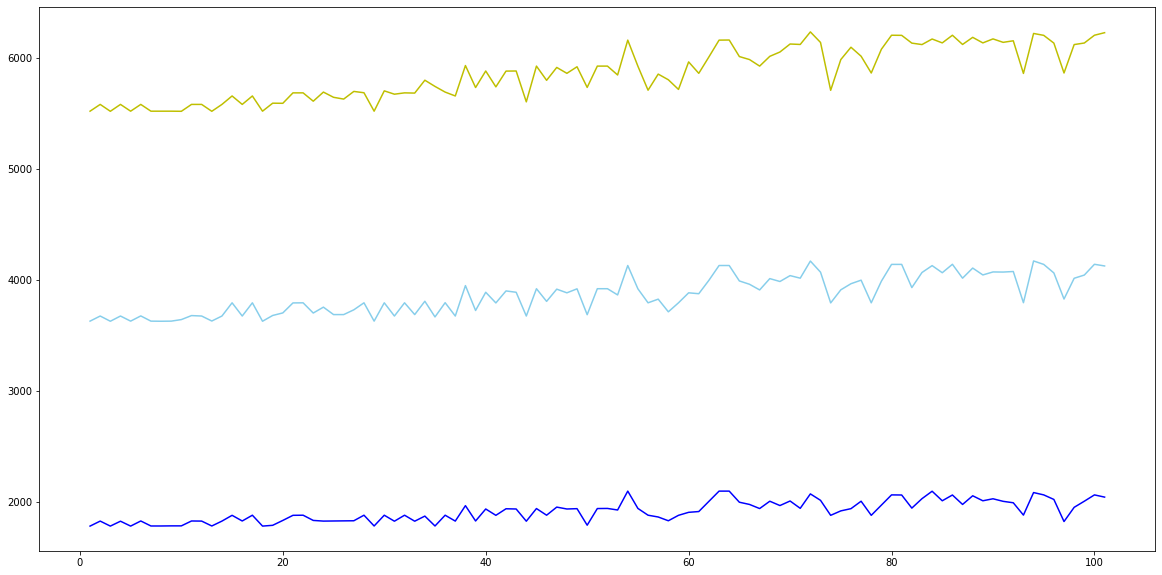

In [239]:
x_data = top100.Rank
y_data_10K = top100['10K']
y_data_20K = top100['20K']
y_data_30K = top100['30K']

plt.figure(figsize = (20,10))
plt.plot(x_data, y_data_10K, c='blue')
plt.plot(x_data, y_data_20K, c = 'skyblue')
plt.plot(x_data, y_data_30K, c = 'y')
plt.show()

## 5. Scatter Chart

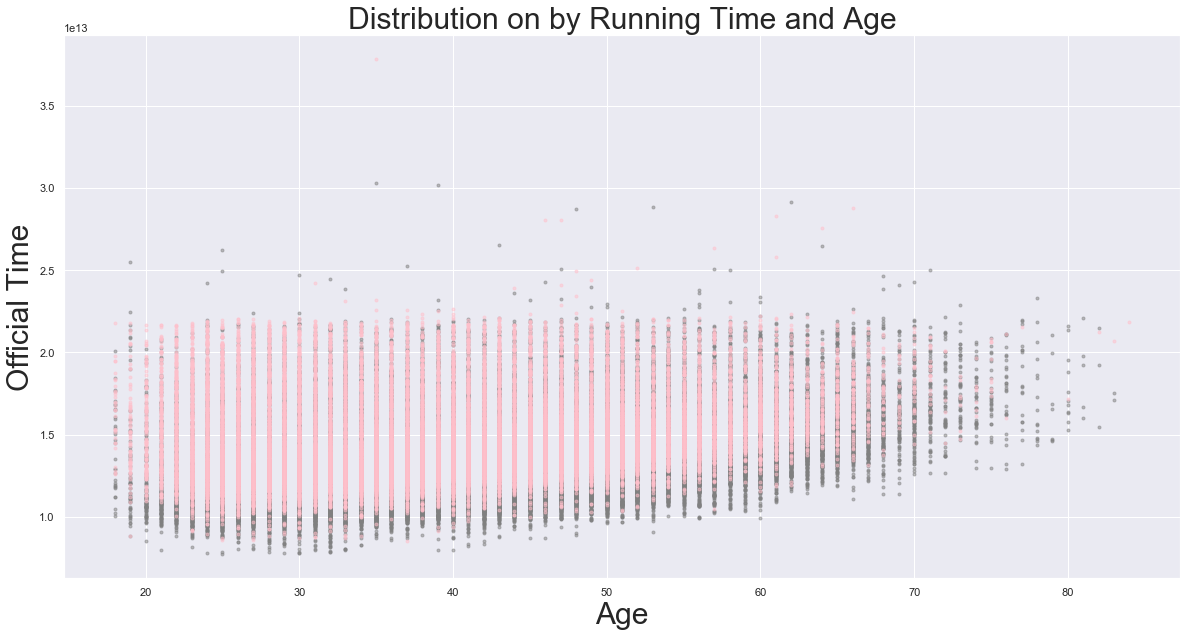

In [315]:
male_runner = marathon_2015_2017[marathon_2015_2017['M/F']=='M']
female_runner = marathon_2015_2017[marathon_2015_2017['M/F']=='F']

plt.figure(figsize=(20,10))
x_male = male_runner.Age
y_male = male_runner['Official Time']
x_female = female_runner.Age
y_female = female_runner['Official Time']

plt.plot(x_male, y_male, '.', color='grey', alpha=0.5)
plt.plot(x_female, y_female, '.', color='pink', alpha=0.5)
plt.xlabel('Age', fontsize = 30)
plt.ylabel('Official Time', fontsize = 30)
plt.title('Distribution on by Running Time and Age', fontsize = 30)
plt.show()

## 6. Bubble Chart

In [246]:
marathon_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 27 columns):
Bib                         26410 non-null object
Name                        26410 non-null object
Age                         26410 non-null int64
M/F                         26410 non-null object
City                        26410 non-null object
State                       22815 non-null object
Country                     26410 non-null object
Citizen                     1254 non-null object
5K                          26410 non-null object
10K                         26410 non-null object
15K                         26410 non-null object
20K                         26410 non-null object
Half                        26410 non-null object
25K                         26410 non-null object
30K                         26410 non-null object
35K                         26410 non-null object
40K                         26410 non-null object
Pace                        26410 non-null 

In [265]:
# marathon_2017 = pd.read_csv('../marathon_source_data/boston_data/marathon_results_2017.csv')
marathon_2017.drop(['Unnamed: 0','Bib','Name','Age','City','State','Country','Citizen','Unnamed: 9','Half','Pace','Proj Time','Overall','Gender','Division','Official Time'],axis=1,inplace=True)

In [267]:
# 시간단위초 데이터타입 변환
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K'])
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K'])
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K'])
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K'])
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K'])
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K'])
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K'])
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K'])

# 초단위로 데이터타입 변환
marathon_2017['5K'] = marathon_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = marathon_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = marathon_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = marathon_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = marathon_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = marathon_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = marathon_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = marathon_2017['40K'].astype('m8[s]').astype(np.int64)
marathon_2017

,M/F,5K,10K,15K,20K,25K,30K,35K,40K
0,M,925,1828,2744,3675,4619,5581,6499,7373
1,M,924,1827,2744,3675,4619,5581,6499,7394
2,M,925,1829,2744,3676,4620,5581,6511,7418
3,M,925,1829,2744,3679,4620,5581,6538,7475
4,M,925,1828,2744,3675,4619,5581,6521,7500
...,...,...,...,...,...,...,...,...,...
26405,F,2804,5741,8615,11564,15126,18188,21318,24417
26406,M,1923,3933,6737,10181,13819,17401,21228,24861
26407,F,3191,6216,9156,0,15321,18397,21633,24878
26408,M,2434,5239,8237,11500,14770,18429,21967,24968


In [268]:
# 2시간이 넘었는지 학인하기 위해 check_time 정의 (2시간)
check_time = 7200        # 2시간 = 7200초
Lat = 0
Long = 0
Location = ''

# 포인트 좌표 위도와 경도로 표현
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

# 참가자의 시간을 check_time을 각 구간별로 어느 구간에 속하는지 속하는 구간에 표현
marathon_location = pd.DataFrame(columns=['Lat','Long'])
#  iterrows()   -->   한 row를 하나씩 돌려서 append
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat,
                                        'Long' : Long},
                                        ignore_index=True)

In [270]:
marathon_location.head()

,Lat,Long
0,42.352089,-71.124947
1,42.352089,-71.124947
2,42.352089,-71.124947
3,42.352089,-71.124947
4,42.352089,-71.124947


In [271]:
marathon_count = marathon_location.groupby(['Lat','Long']).size().reset_index(name='Count')
marathon_count

,Lat,Long,Count
0,42.274032,-71.423979,49
1,42.282364,-71.364801,4435
2,42.297870,-71.284260,13866
3,42.324830,-71.259660,7261
4,42.345680,-71.215169,737
5,42.351510,-71.086980,6
6,42.352089,-71.124947,56


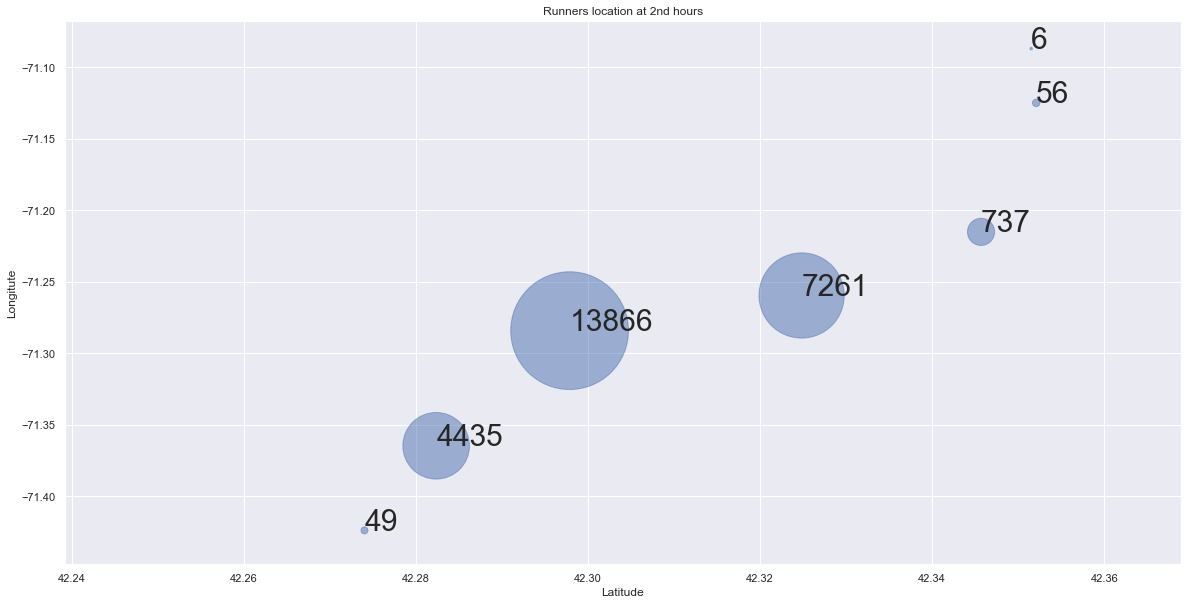

In [314]:
plt.figure(figsize=(20,10))
plt.scatter(marathon_count.Lat, marathon_count.Long, s = marathon_count.Count, alpha=0.5)
   # Bubble Chart 는 Scatter Chart의 일종

# Deco . 각각 몇 명있는지 표시
# 배열같은 형태를 만들어 준다 enumerate
for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]),fontsize=30)

plt.title('Runners location at 2nd hours')
plt.xlabel('Latitude')
plt.ylabel('Longitute')
plt.show()

## 7. Heat Map

In [277]:
import seaborn as sns
sns.set()
marathon_2015_2017_under60 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(0,61))]
marathon_2015_2017_under60.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 74945 entries, 02:09:17 to 07:58:14
Data columns (total 26 columns):
10K                         74945 non-null int64
15K                         74945 non-null int64
20K                         74945 non-null int64
25K                         74945 non-null int64
30K                         74945 non-null int64
35K                         74945 non-null int64
40K                         74945 non-null int64
5K                          74945 non-null int64
Age                         74945 non-null int64
Bib                         49926 non-null object
Citizen                     3318 non-null object
City                        74944 non-null object
Country                     74945 non-null object
Division                    74945 non-null int64
Gender                      74945 non-null int64
Half                        74945 non-null int64
M/F                         74945 non-null object
Name                        74945 non-nu

unstack() --> 행과 영을 바꿔주는 함수

In [278]:
# Age 별로 group by, 남성과 여성을 나눔
marathon = marathon_2015_2017_under60.groupby('Age')['M/F'].value_counts().unstack().fillna(0)
marathon.head()

M/F,F,M
Age,,
18,30,32
19,70,67
20,139,125
21,253,236
22,422,279


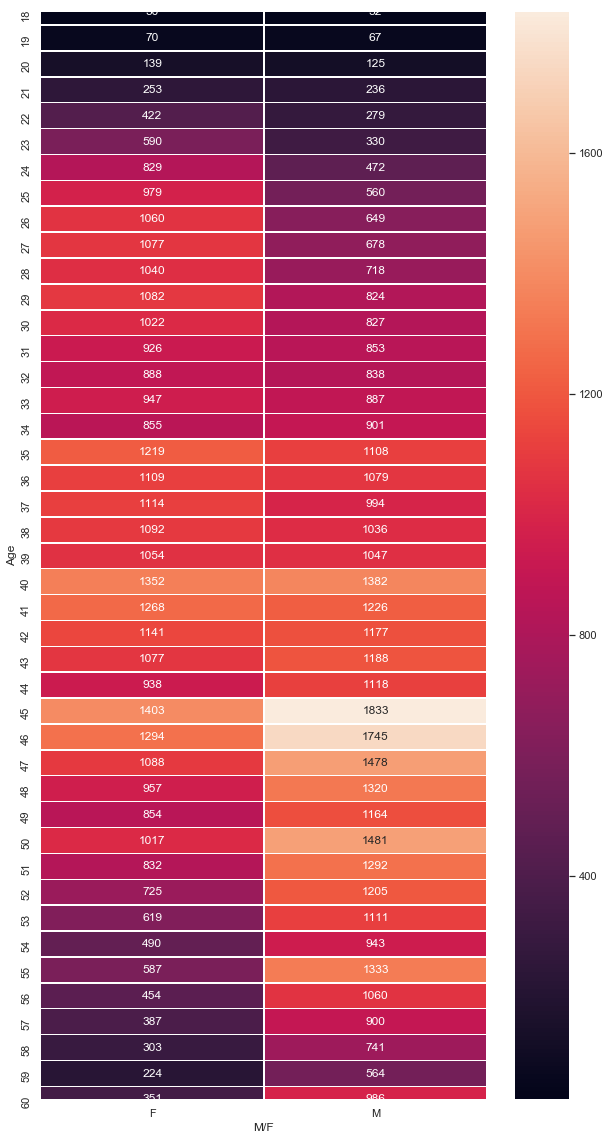

In [288]:
f, ax = plt.subplots(figsize=(10,20))
sns.heatmap(marathon, annot=True, fmt='d', linewidths=.5, ax=ax)
# annot = True --> 글자 표시
# fmt = 포맷 d
# ax는 subplot을 준다
# cmap = heatmap color 변경

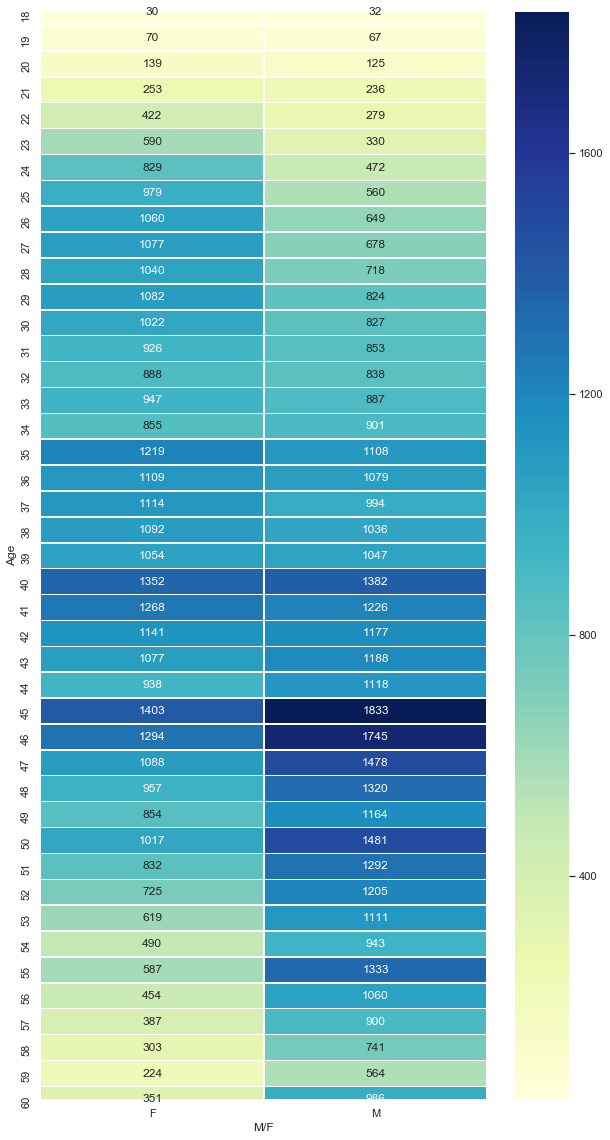

In [289]:
f, ax = plt.subplots(figsize=(10,20))
sns.heatmap(marathon, annot=True, fmt='d', linewidths=.5, ax=ax, cmap='YlGnBu')
# annot = True --> 글자 표시
# fmt = 포맷 d
# ax는 subplot을 준다
# cmap = heatmap color 변경

## 8. Histogram
- segment 별 bins를 이용하여 나눠준다

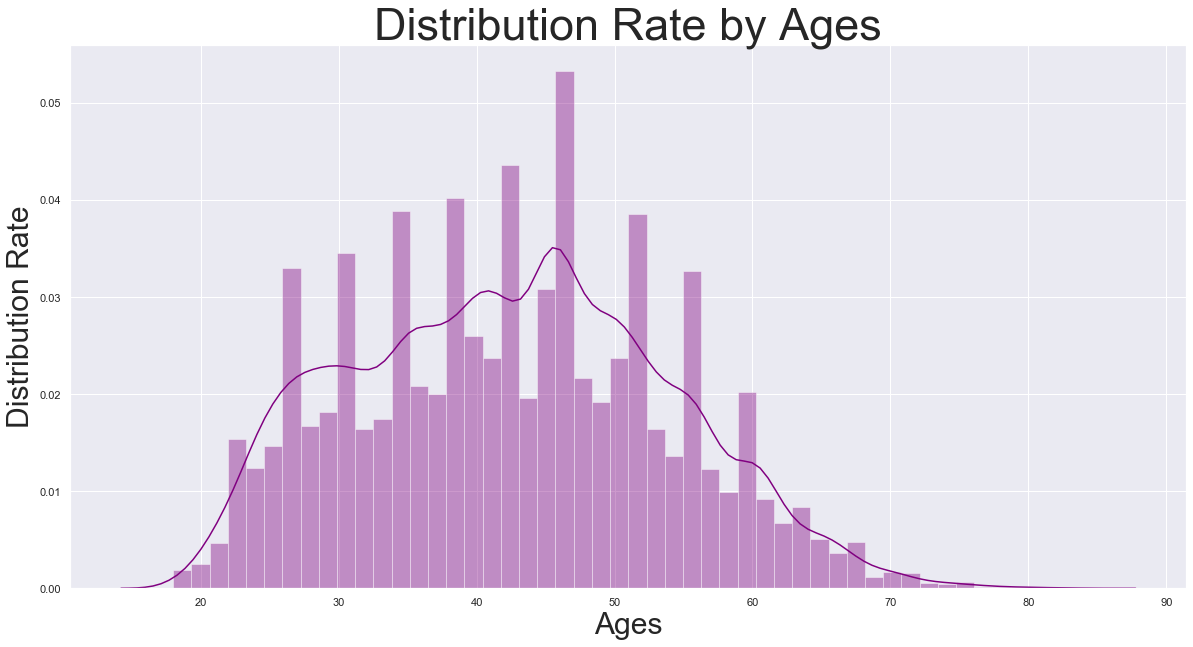

In [327]:
# 연령대 별 사람 비율
plt.figure(figsize=(20,10))
# Create histogram - Distribution Rate
age_count = sns.distplot(marathon_2015_2017.Age, color='purple')   # distplot --> Histogram 만들어준다
age_count.set_xlabel('Ages',fontdict= {'size':30})
age_count.set_ylabel('Distribution Rate',fontdict= {'size':30})
age_count.set_title('Distribution Rate by Ages',fontsize=45)
plt.show()

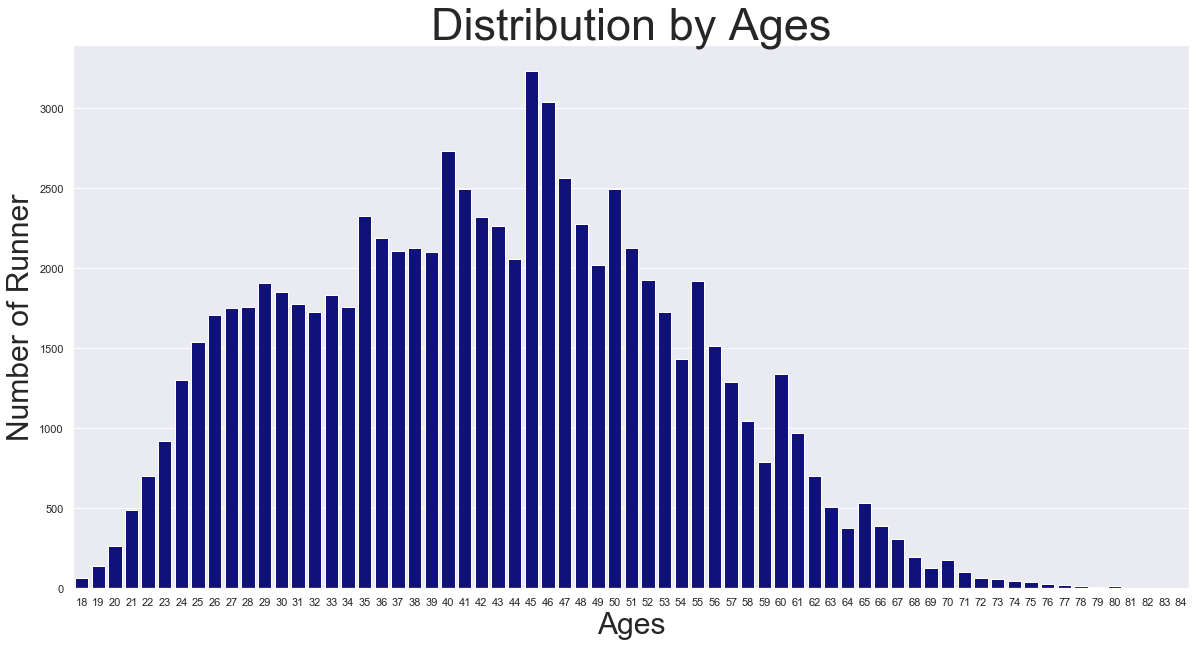

In [308]:
plt.figure(figsize=(20,10))
# Create histogram - Distribution by Ages
age_count = sns.countplot('Age',data=marathon_2015_2017, color = 'darkblue')
# y축에 비율이 아닌 숫자 표시
age_count.set_title('Distribution by Ages', fontsize=45)
age_count.set_xlabel('Ages', fontdict= {'size':30})
age_count.set_ylabel('Number of Runner', fontdict= {'size':30})
plt.show()

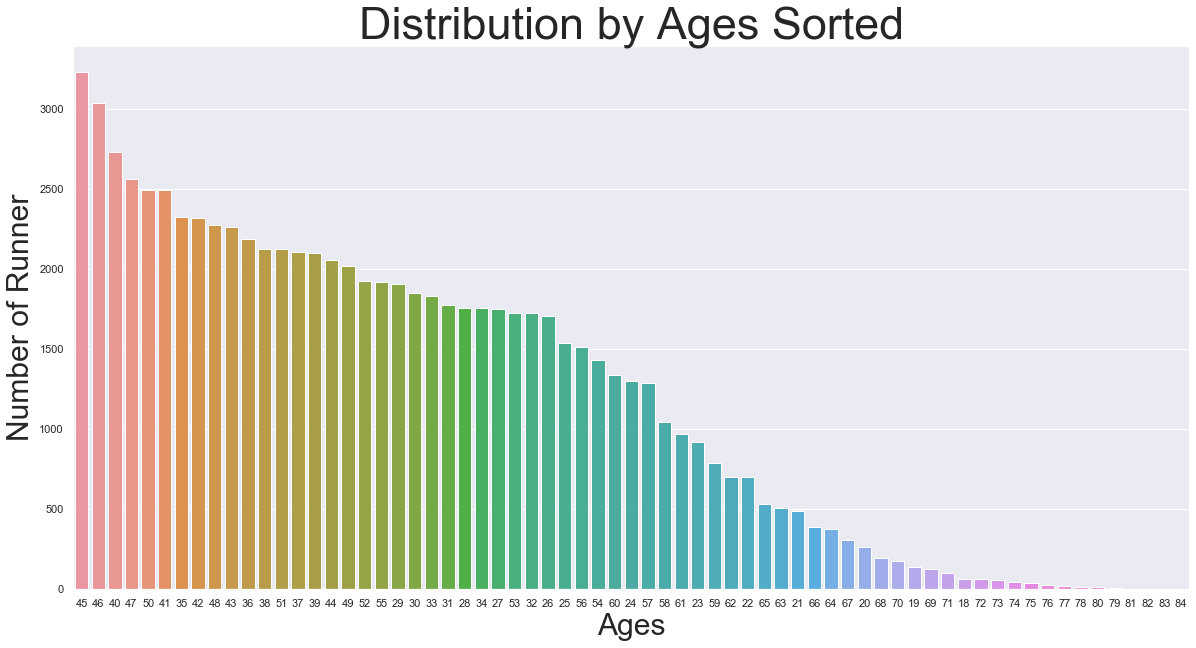

In [323]:
# sort -> Age
plt.figure(figsize=(20,10))
# Create histogram - Distribution by Ages Sorted 
age_count = sns.countplot('Age',data=marathon_2015_2017,order = marathon_2015_2017['Age'].value_counts().index)
age_count.set_title('Distribution by Ages Sorted', fontsize=45)
age_count.set_xlabel('Ages', fontdict= {'size':30})
age_count.set_ylabel('Number of Runner', fontdict= {'size':30})
plt.show()

## 9. Box Plot

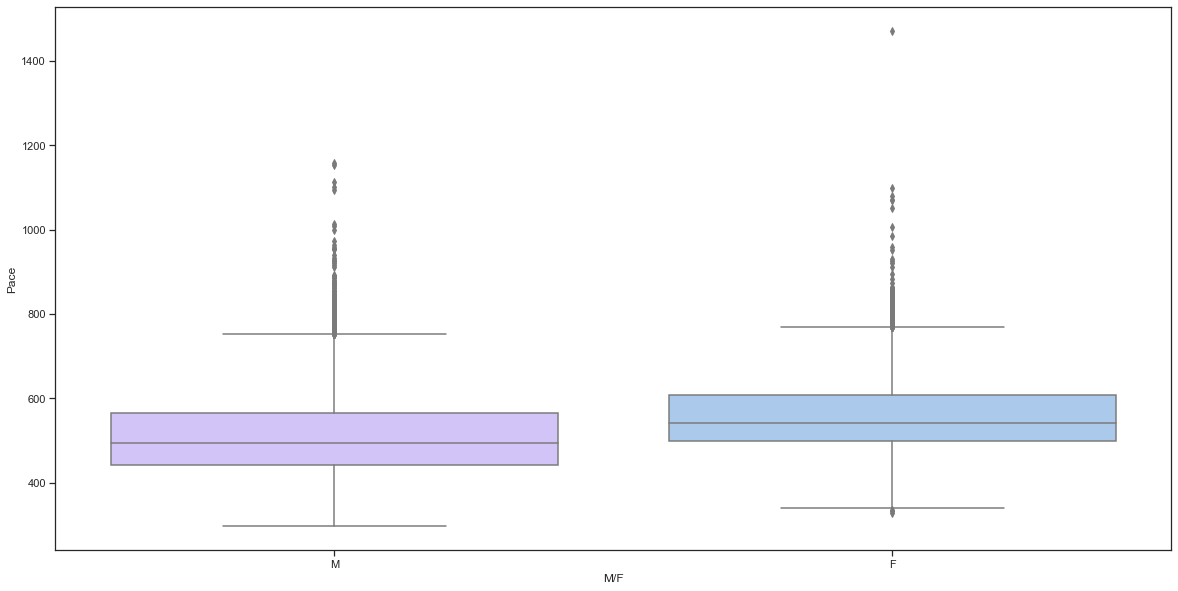

In [337]:
# USA Runner
usa_runner = marathon_2015_2017[marathon_2015_2017.Country == 'USA']
usa_male_runner = usa_runner[usa_runner['M/F'] == 'M']
usa_female_runner = usa_runner[usa_runner['M/F'] == 'F']

plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="pastel")
# style='whitegrid' 등 api 참조

sns.boxplot(x='M/F', y='Pace',
            palette=["m", "b"],
            data=usa_runner)

In [343]:
usa_male_runner_statistics = usa_male_runner['Pace'].describe()
usa_female_runner_statistics = usa_female_runner['Pace'].describe()
usa_female_runner_statistics

count    31084.000000
mean       561.858448
std         88.425649
min        328.000000
25%        499.000000
50%        541.000000
75%        607.000000
max       1470.000000
Name: Pace, dtype: float64

## 10. Geo Chart
- 지도 활용
- 2시간이 지난 시간에 사람들이 어디에 많이 분포해있는지 -- Bubble chart로 확인
- conda install folium install folium -c conda-forge

In [348]:
marathon_results_2017 = pd.read_csv("../marathon_source_data/boston_data/marathon_results_2017.csv")

#Drop unnecessary columns 
marathon_2017 = marathon_results_2017.drop(['Unnamed: 0','Bib', 'Name', 'Age', 'City', 'State', 'Country', 'Citizen', 'Unnamed: 9', 'Half', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'], axis='columns')

# Import Numpy Library and call it as np
import numpy as np
marathon_2017.head()

,M/F,5K,10K,15K,20K,25K,30K,35K,40K
0,M,0:15:25,0:30:28,0:45:44,1:01:15,1:16:59,1:33:01,1:48:19,2:02:53
1,M,0:15:24,0:30:27,0:45:44,1:01:15,1:16:59,1:33:01,1:48:19,2:03:14
2,M,0:15:25,0:30:29,0:45:44,1:01:16,1:17:00,1:33:01,1:48:31,2:03:38
3,M,0:15:25,0:30:29,0:45:44,1:01:19,1:17:00,1:33:01,1:48:58,2:04:35
4,M,0:15:25,0:30:28,0:45:44,1:01:15,1:16:59,1:33:01,1:48:41,2:05:00


In [349]:
# Timedelt 형태로 변환
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K'])
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K'])
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K'])
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K'])
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K'])
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K'])
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K'])
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K'])

# 초 형태로 변환
marathon_2017['5K'] = marathon_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = marathon_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = marathon_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = marathon_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = marathon_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = marathon_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = marathon_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = marathon_2017['40K'].astype('m8[s]').astype(np.int64)
marathon_2017.head()

,M/F,5K,10K,15K,20K,25K,30K,35K,40K
0,M,925,1828,2744,3675,4619,5581,6499,7373
1,M,924,1827,2744,3675,4619,5581,6499,7394
2,M,925,1829,2744,3676,4620,5581,6511,7418
3,M,925,1829,2744,3679,4620,5581,6538,7475
4,M,925,1828,2744,3675,4619,5581,6521,7500


In [350]:
check_time = 7200   # 2시간의 초
Lat = 0
Long = 0
Location = ''

# 5k, 10k .. 의 위치정보
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]

marathon_location = pd.DataFrame(columns=['Lat','Long'])
for index, record in marathon_2017.iterrows():
    if (record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif (record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]
    elif (record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]
    elif (record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]
    elif (record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]
    elif (record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]
    elif (record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]
    elif (record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]
    else:
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat' : Lat,
                                        'Long' : Long},
                                        ignore_index=True)
# count 하는거 size를 재는 것 size, column 이름을 'Count'로 설정
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

In [351]:
marathon_count

,Lat,Long,Count
0,42.274032,-71.423979,49
1,42.282364,-71.364801,4435
2,42.297870,-71.284260,13866
3,42.324830,-71.259660,7261
4,42.345680,-71.215169,737
5,42.351510,-71.086980,6
6,42.352089,-71.124947,56


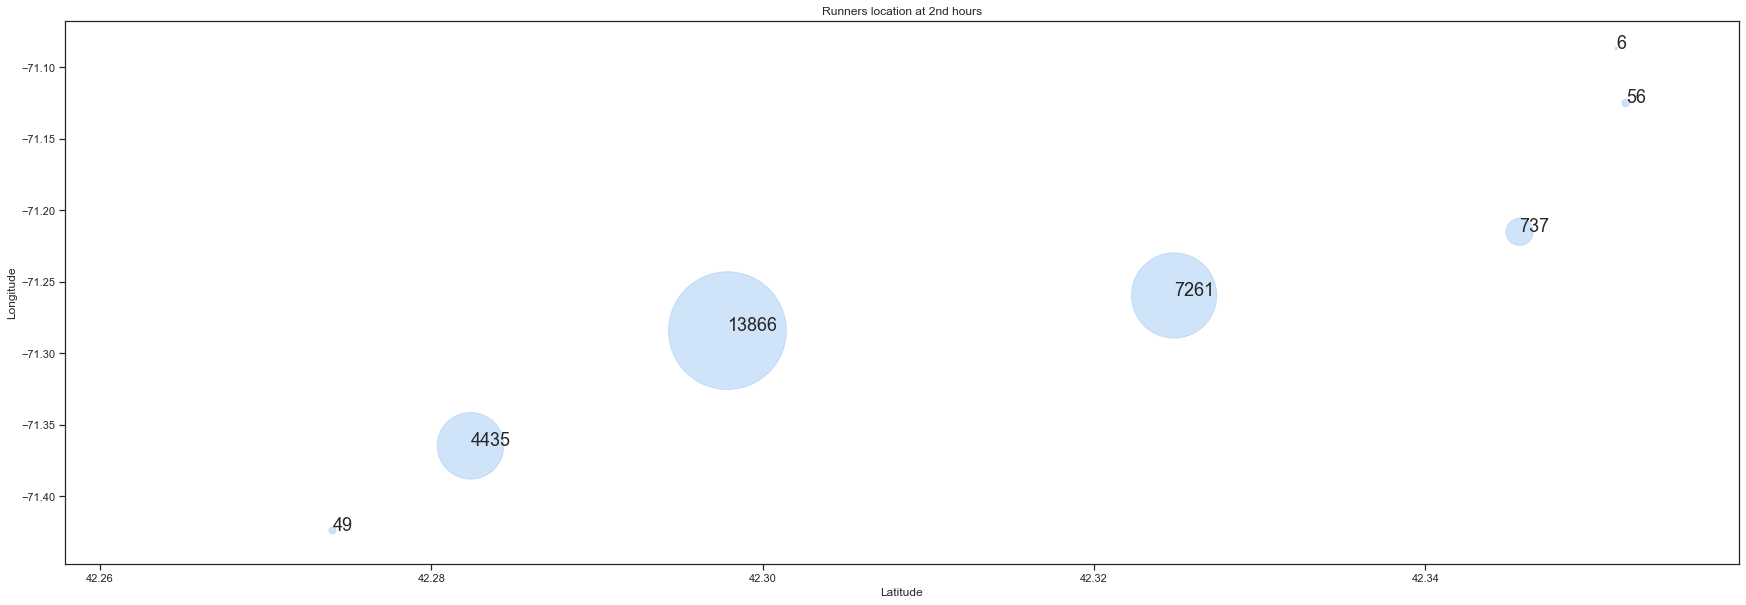

In [352]:
plt.figure(figsize=(30,10))
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)

plt.title("Runners location at 2nd hours")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

Import folium for Geo Map

In [365]:
import folium
from folium.plugins import HeatMap

# Create basic Folium marathon map
a = folium.Map(location=[42.324830,-71.259660], # 25K 지점
                       tiles = "OpenStreetMap",  # tiles에 따라 다른 모양 가능
                       zoom_start = 11)
# data : marathon_count
HeatMap(marathon_count, radius=20).add_to(a)

a

## GUI - tkinter()

In [372]:
import numpy as np
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import math

MAXVAL = 0
INTERVAL = 1000    # 1000명 단위

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)   # add subplot

In [406]:
record = pd.DataFrame(marathon_2015_2017,columns=['5K',  '10K',  '15K',  '20K', 'Half',  '25K',  '30K',  '35K',  '40K',  'Official Time']).sort_values(by=['Official Time'])

record['Official Time'] = record['Official Time'].astype('m8[s]').astype(np.int64)

# DataFrame을 list로 생성
record_list = record.values.tolist()

xData = [5, 10, 15, 20, 21.098, 25, 30, 35, 40, 42.195 ]
record.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 79638 entries, 02:09:17 to 10:30:23
Data columns (total 10 columns):
5K               79638 non-null int64
10K              79638 non-null int64
15K              79638 non-null int64
20K              79638 non-null int64
Half             79638 non-null int64
25K              79638 non-null int64
30K              79638 non-null int64
35K              79638 non-null int64
40K              79638 non-null int64
Official Time    79638 non-null int64
dtypes: int64(10)
memory usage: 6.7 MB


In [407]:
record_list = record.values.tolist()

In [408]:
record.head()

,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
Official Time_Time_Type,,,,,,,,,,
02:09:17,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
02:09:37,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
02:09:48,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
02:09:58,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
02:10:22,883,1783,2697,3629,3842,4567,5520,6479,7381,7822


In [411]:
record_list

[[883, 1783, 2697, 3629, 3842, 4567, 5520, 6479, 7359, 7757],
 [925, 1828, 2744, 3675, 3875, 4619, 5581, 6499, 7373, 7777],
 [883, 1783, 2698, 3628, 3841, 4567, 5519, 6479, 7362, 7788],
 [924, 1827, 2744, 3675, 3875, 4619, 5581, 6499, 7394, 7798],
 [883, 1783, 2697, 3629, 3842, 4567, 5520, 6479, 7381, 7822],
 [925, 1829, 2744, 3676, 3876, 4620, 5581, 6511, 7418, 7828],
 [883, 1784, 2701, 3629, 3842, 4567, 5520, 6483, 7427, 7847],
 [883, 1784, 2698, 3628, 3841, 4567, 5520, 6479, 7407, 7849],
 [884, 1785, 2699, 3629, 3842, 4567, 5520, 6479, 7398, 7852],
 [885, 1785, 2720, 3643, 3843, 4565, 5519, 6486, 7445, 7880],
 [925, 1829, 2744, 3679, 3885, 4620, 5581, 6538, 7475, 7928],
 [925, 1828, 2744, 3675, 3875, 4619, 5581, 6521, 7500, 7955],
 [884, 1784, 2699, 3630, 3842, 4567, 5519, 6479, 7498, 7962],
 [925, 1828, 2744, 3675, 3875, 4619, 5581, 6532, 7521, 7965],
 [947, 1880, 2827, 3794, 4005, 4755, 5657, 6624, 7559, 7965],
 [925, 1829, 2744, 3675, 3876, 4620, 5581, 6546, 7541, 7996],
 [947, 1

In [414]:
def update():
    t_a = int(t_aSpbox.get())
    MAXVAL = t_a * INTERVAL
    ax.set_xlabel('Distance(km)')
    ax.set_ylabel('Time(Second)')
    ax.set_title(str(t_a) + ' records of runners')
    
    for t in range(0, MAXVAL, INTERVAL):
        ax.plot(xData, record_list[int(t)], 'o', label=str(t+1))    

    ax.legend()
    fig.canvas.draw()

main = Tk()
main.title("Marathon Records")
main.geometry()

label=Label(main, text='Marathon Records')
label.config(font=("Courier", 18))
label.grid(row=0,column=0,columnspan=4)   # 1번째 row, 1번째 column, 4개 column 통합

t_aVal  = DoubleVar(value=1.0)

t_aSpbox = Spinbox(main, textvariable=t_aVal ,from_=0, to=100, increment=1, justify=RIGHT)
t_aSpbox.config(state='readonly')   # 직접 수정x 버튼으로만  수정가능
t_aSpbox.grid(row=1,column=1)
t_aLabel= Label(main, text='Number of runner : ')                
t_aLabel.grid(row=1,column=0)

Button(main,text="Run",width=20,height=5,command=lambda:update()).grid(row=1, column=2, columnspan=2, rowspan=1)

canvas = FigureCanvasTkAgg(fig, main)
canvas.get_tk_widget().grid(row=4,column=0,columnspan=3) 

main.mainloop()